EDA
---

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk import word_tokenize
from nltk import tokenize

##### 描述性统计

In [8]:
data = pd.read_csv('train.csv')
data.describe()

,discourse_id,essay_id,discourse_text,discourse_type,discourse_effectiveness
count,36765,36765,36765,36765,36765
unique,36765,4191,36691,7,3
top,0013cc385424,91B1F82B2CF1,Summer projects should be student-designed,Evidence,Adequate
freq,1,23,14,12105,20977


In [9]:
data.head(10)

,discourse_id,essay_id,discourse_text,discourse_type,discourse_effectiveness
0,0013cc385424,007ACE74B050,"Hi, i'm Isaac, i'm going to be writing about h...",Lead,Adequate
1,9704a709b505,007ACE74B050,"On my perspective, I think that the face is a ...",Position,Adequate
2,c22adee811b6,007ACE74B050,I think that the face is a natural landform be...,Claim,Adequate
3,a10d361e54e4,007ACE74B050,"If life was on Mars, we would know by now. The...",Evidence,Adequate
4,db3e453ec4e2,007ACE74B050,People thought that the face was formed by ali...,Counterclaim,Adequate
5,36a565e45db7,007ACE74B050,"though some say that life on Mars does exist, ...",Rebuttal,Ineffective
6,fb65fe816ba3,007ACE74B050,"It says in paragraph 7, on April 5, 1998, Mars...",Evidence,Adequate
7,4e472e2584fa,007ACE74B050,Everyone who thought it was made by alieans ev...,Counterclaim,Adequate
8,28a94d3ee425,007ACE74B050,Though people were not satified about how the ...,Concluding Statement,Adequate
9,d226f06362f5,00944C693682,Limiting the usage of cars has personal and pr...,Lead,Effective


In [10]:
data.essay_id.value_counts()

91B1F82B2CF1    23
4CA37D113612    23
900A879708F0    23
A7EC6F462F8B    22
DECAE402BB38    22
                ..
AB02689C1A9B     1
FFFF80B8CC2F     1
377548575048     1
5E85F1FB4E22     1
9706F8E7D534     1
Name: essay_id, Length: 4191, dtype: int64

可以看出，有的文章包含的议论元素有多种（总共7种），总数达到了23，而有些文章包含的议论元素的总数只有 1

In [11]:
data.loc[data.essay_id == '91B1F82B2CF1']

,discourse_id,essay_id,discourse_text,discourse_type,discourse_effectiveness
25190,2d4def8e7c09,91B1F82B2CF1,Many people may think that attending school on...,Lead,Adequate
25191,0a6634792991,91B1F82B2CF1,I would say that I disagree with that statemen...,Position,Adequate
25192,e73c3a854460,91B1F82B2CF1,"Yes, online school would be better for student...",Counterclaim,Adequate
25193,57d92e1dddb3,91B1F82B2CF1,but what about in the future when they lack ba...,Rebuttal,Adequate
25194,4e57f20c26e0,91B1F82B2CF1,"yes, the online courses could be more personal...",Counterclaim,Adequate
25195,2e8d1ead6a99,91B1F82B2CF1,not all. Even if online school is more persona...,Rebuttal,Adequate
25196,cef7e3667fca,91B1F82B2CF1,People with the idea that online school is the...,Counterclaim,Adequate
25197,764225413a40,91B1F82B2CF1,"however, I would argue that practicing to wake...",Rebuttal,Adequate
25198,093a12dbd472,91B1F82B2CF1,"In the real world, employers are not going to ...",Evidence,Effective
25199,00ec98773bda,91B1F82B2CF1,Compromise is a skill that is required in the ...,Evidence,Adequate


In [12]:
data.loc[data.essay_id=='9706F8E7D534']

,discourse_id,essay_id,discourse_text,discourse_type,discourse_effectiveness
8358,11057d62414d,9706F8E7D534,Luke Bomberger was just an ordanery small town...,Evidence,Ineffective


In [13]:
data.discourse_type.value_counts()

Evidence                12105
Claim                   11977
Position                 4024
Concluding Statement     3351
Lead                     2291
Counterclaim             1773
Rebuttal                 1244
Name: discourse_type, dtype: int64

In [14]:
data.discourse_effectiveness.value_counts()

Adequate       20977
Effective       9326
Ineffective     6462
Name: discourse_effectiveness, dtype: int64

##### 数据分析

我们可以看到一共有 36765 个议论元素，但是议论元素的文本内容只有 36691，说明有的议论元素的文本内容在不同文章中重复出现

In [15]:
def highlight_duplicate(val):
    if val.discourse_text == "Big States ":
        return ['background-color: green']*len(val)
    else:
        return ['background-color: white']*len(val) 

duplicates = data[data.discourse_text.duplicated(keep=False)].sort_values(by="discourse_text")
duplicates.head(10).style.apply(highlight_duplicate, axis=1)

,discourse_id,essay_id,discourse_text,discourse_type,discourse_effectiveness
26691,7f9c3500259d,A602D45D22B2,"""That's a lava dome that takes the form of an isolated mesa about the same height as the Face on Mars.""",Evidence,Adequate
27350,d628a6adda3a,ADB68BCD2874,"""That's a lava dome that takes the form of an isolated mesa about the same height as the Face on Mars.""",Evidence,Adequate
25391,781452d9404c,942ECB176B3A,"At the most basic level, the electoral college is unfair to voters.",Position,Adequate
28835,6fa171a95540,C2BAF4ADA2CA,"At the most basic level, the electoral college is unfair to voters.",Claim,Adequate
28436,9e12ec699196,BB3A6C2D0B65,Big States,Claim,Adequate
20121,35bf70c4a673,4CA37D113612,Big States,Claim,Ineffective
3933,c5b2ecb3888e,44E2726DA1B3,I agree,Position,Adequate
11285,5e4022e93247,CB66B685DAF6,I agree,Position,Adequate
17087,99782ca26927,2714214F7D9E,I think students should be required to perform community service.,Position,Adequate
29590,33d6bbba823c,CE64FA08E4CF,I think students should be required to perform community service.,Position,Adequate


In [16]:
duplicates.describe()

,discourse_id,essay_id,discourse_text,discourse_type,discourse_effectiveness
count,119,119,119,119,119
unique,119,108,45,6,3
top,7f9c3500259d,6F896BABB13C,Summer projects should be student-designed,Position,Adequate
freq,1,2,14,67,99


In [17]:
true_duplicates = duplicates.groupby(["discourse_type", "discourse_text"]).discourse_effectiveness.nunique().to_frame()
true_duplicates.columns = ["nunique_discourse_effectiveness"]
true_duplicates = true_duplicates[true_duplicates.nunique_discourse_effectiveness>1].reset_index(drop=False)
true_duplicates

,discourse_type,discourse_text,nunique_discourse_effectiveness
0,Claim,Big States,2
1,Claim,"Second, there could be a tie in the electoral ...",2
2,Claim,The Electoral College is unfair,2
3,Claim,"be creative,",2
4,Claim,"opinions,",2
5,Claim,you can help others.,2
6,Counterclaim,Opponents say that cell phones are good becaus...,2
7,Lead,"When people ask for advice, they sometimes tal...",2
8,Position,I would want to keep the Electoral College,2
9,Position,Seeking multiple opinions can help someone mak...,2


In [18]:
duplicates = duplicates[duplicates.discourse_text.isin(true_duplicates.discourse_text.unique())]
duplicates

,discourse_id,essay_id,discourse_text,discourse_type,discourse_effectiveness
28436,9e12ec699196,BB3A6C2D0B65,Big States,Claim,Adequate
20121,35bf70c4a673,4CA37D113612,Big States,Claim,Ineffective
20842,34b98386dc46,5729D5AE055C,I would want to keep the Electoral College,Position,Effective
28406,98154af4855d,BACC53ECC1FB,I would want to keep the Electoral College,Position,Adequate
11970,cc0dad1234ec,D8013F49DE51,Opponents say that cell phones are good becaus...,Counterclaim,Adequate
6570,dee3f8aec4fc,7742D58270C9,Opponents say that cell phones are good becaus...,Counterclaim,Ineffective
31753,b318a4e3b80e,EE2FC4219F49,"Second, there could be a tie in the electoral ...",Claim,Effective
31757,43848fd5dfb3,EE2FC4219F49,"Second, there could be a tie in the electoral ...",Claim,Adequate
35299,608e1d81f4ed,9627B47C10DE,Seeking multiple opinions can help someone mak...,Position,Effective
34383,3312a23a5480,523EBD9ECA47,Seeking multiple opinions can help someone mak...,Position,Adequate


可以看出，在不同文章中，一些相同内容的议论元素的有效性会出现不同的结果，这样的议论元素一共有 11 条

##### 可视化

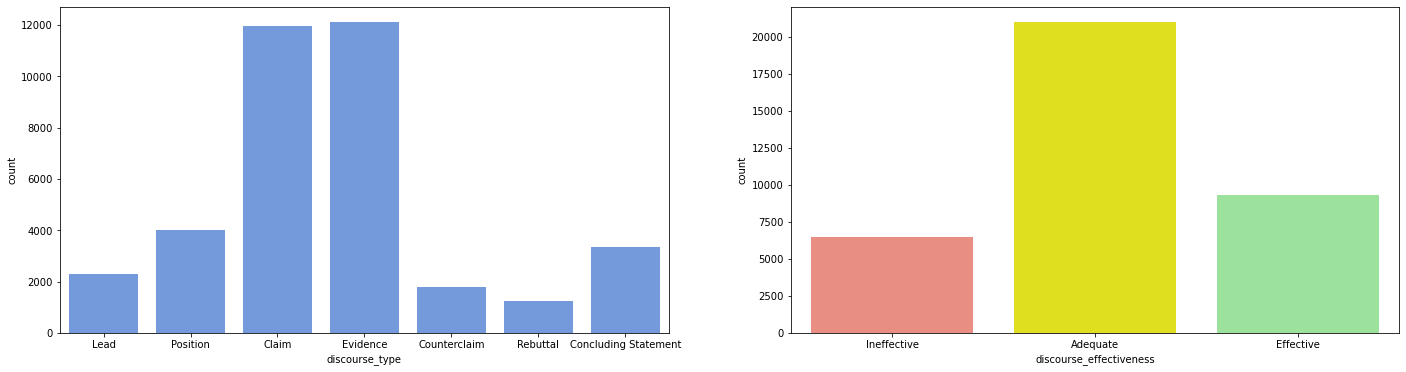

In [19]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))
sns.countplot(data = data, x = "discourse_type", ax = ax[0], color='cornflowerblue')
sns.countplot(data = data, x = "discourse_effectiveness", order = ['Ineffective', 'Adequate', 'Effective'], ax = ax[1], palette=['salmon', 'yellow', 'lightgreen'])
plt.show()

In [20]:
temp = data.groupby(["essay_id"]).discourse_type.value_counts().to_frame()
temp.columns = ['amount']
temp.reset_index(drop = False, inplace=True)
temp = temp.pivot(index="essay_id", columns = "discourse_type").amount
temp

discourse_type,Claim,Concluding Statement,Counterclaim,Evidence,Lead,Position,Rebuttal
essay_id,,,,,,,
00066EA9880D,3.0,1.0,NaN,3.0,1.0,1.0,NaN
000E6DE9E817,5.0,1.0,1.0,3.0,NaN,1.0,1.0
0016926B079C,7.0,NaN,NaN,3.0,NaN,1.0,NaN
00203C45FC55,1.0,1.0,3.0,3.0,1.0,1.0,3.0
0029F4D19C3F,2.0,1.0,1.0,2.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...
FFA381E58FC6,2.0,1.0,NaN,1.0,NaN,1.0,NaN
FFC43F453EF6,4.0,1.0,3.0,1.0,NaN,1.0,1.0
FFD97A99CEBA,NaN,NaN,NaN,1.0,NaN,NaN,NaN


In [21]:
temp.mean()

discourse_type
Claim                   3.172715
Concluding Statement    1.005702
Counterclaim            1.314307
Evidence                2.904968
Lead                    1.000874
Position                1.004744
Rebuttal                1.223206
dtype: float64

d:\Software\MiniConda\miniconda\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:>

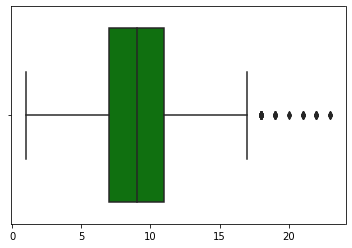

In [22]:
sns.boxplot(temp.fillna(0).sum(axis=1), color='green')

可以看出，平均每篇文章包含有 8 个议论元素

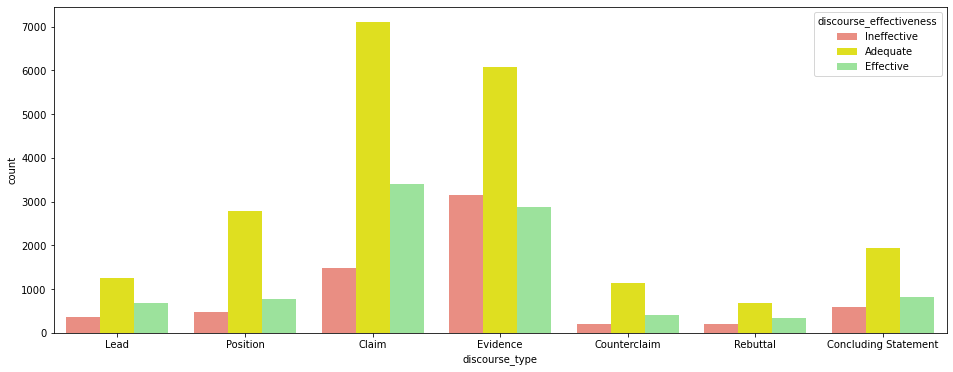

In [23]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16, 6))
sns.countplot(data = data, x = 'discourse_type', hue='discourse_effectiveness', hue_order = ['Ineffective', 'Adequate', 'Effective'], palette = ['salmon', 'yellow', 'lightgreen'])
plt.show()

可以看到，在不同的议论元素中，有效性类别的比例差别不是很大

In [24]:
data["discourse_num_words"] = data.discourse_text.apply(lambda x: len(x.split()))
data["discourse_num_sentences"] = data.discourse_text.apply(lambda x: len(tokenize.sent_tokenize(x)))

(0.0, 15.0)

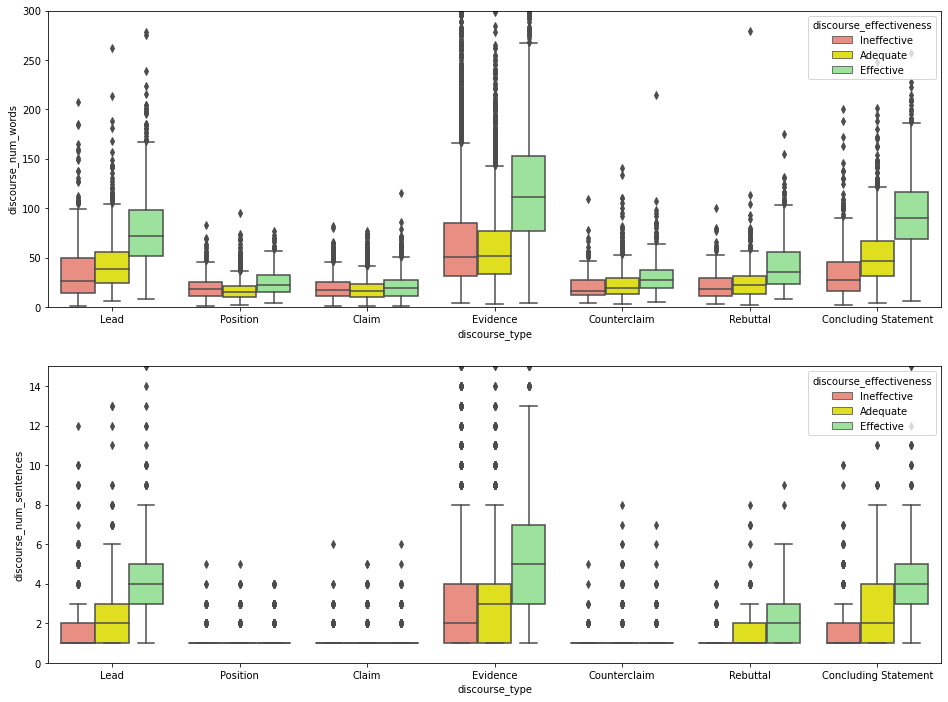

In [40]:
fig, ax = plt.subplots(nrows=2,ncols=1, figsize=(16, 12))
sns.boxplot(data = data, 
            y = 'discourse_num_words', 
            x='discourse_type', 
            hue='discourse_effectiveness', 
            hue_order = ['Ineffective', 'Adequate', 'Effective'], 
            palette = ['salmon', 'yellow', 'lightgreen'],
            ax=ax[0])

ax[0].set_ylim([0,300])


sns.boxplot(data = data, y = 'discourse_num_sentences', 
            x='discourse_type', 
            hue='discourse_effectiveness', 
            hue_order = ['Ineffective', 'Adequate', 'Effective'], 
            palette = ['salmon', 'yellow', 'lightgreen'],
            ax=ax[1])
ax[1].set_ylim([0,15])

可以看出，有效的议论元素一般比无效的议论元素具有更多的词汇

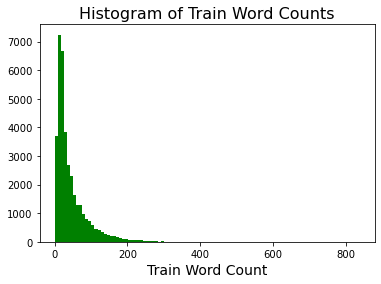

In [41]:
plt.hist(data["discourse_num_words"], bins=100, color='green')
plt.title('Histogram of Train Word Counts',size=16)
plt.xlabel('Train Word Count',size=14)
plt.show()

可以看到，大部分议论元素的单词数都不超过250左右，这可以为以后选择模型参数提供一定的帮助